In [19]:
# Pandas Practice Problems （Continued）

In [20]:
# Download the white wine dataset
from urllib import request
from os import path
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
fn = "winequality-white.csv"
# YOUR CODE HERE
# Download the file if it doesn't exist
if not path.exists(fn):
    data = request.urlopen(url + fn).read()
    with open(fn, 'wb') as fhand:
        fhand.write(data)

# Load the data into a pandas DataFrame
# Note: This dataset uses semicolons as separators
df = pd.read_csv(fn, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Problem 1: groupby
Use the Pandas `groupby` function to create a function that takes no arguments and returns the mean citric acid for wines with each quality level as a series indexed by quality.

In [21]:
means = df.groupby("quality").agg("mean")
means["citric acid"]

quality
3    0.336000
4    0.304233
5    0.337653
6    0.338025
7    0.325625
8    0.326514
9    0.386000
Name: citric acid, dtype: float64

In [22]:
def quality_mean():
    means = df.groupby("quality").agg("mean")
    return means["citric acid"]

In [23]:
assert abs(quality_mean()[9] - 0.386) < 1e-8

### Problem 2: Advanced groupby
Create a new eight-row dataframe called `rollup` based on the `df` dataframe, which reports median pH, median cholides, and median citric acid among wines grouped by whether they are more sugary than most wines, more acidic than more wines, and more alcoholic than most wines. It should look like

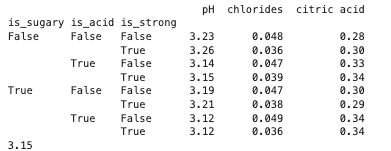

In [24]:
is_sugary = df["residual sugar"] > df["residual sugar"].median()
is_acid = df["fixed acidity"] > df["fixed acidity"].median()
is_strong = df["alcohol"] > df["alcohol"].median()

In [25]:
rollup_tot = df.groupby(by = [is_sugary, is_acid, is_strong]).agg("median")
rollup = rollup_tot[["pH", "chlorides", "citric acid"]]

In [26]:
rollup

pH  chlorides  citric acid
residual sugar fixed acidity alcohol                              
False          False         False    3.23      0.048         0.28
                             True     3.26      0.036         0.30
               True          False    3.14      0.047         0.33
                             True     3.15      0.039         0.34
True           False         False    3.19      0.047         0.30
                             True     3.21      0.038         0.29
               True          False    3.12      0.049         0.34
                             True     3.12      0.036         0.34

In [27]:
print(rollup)
print(rollup.pH[False][True][True])
assert abs(rollup.pH[False][True][True] - 3.15) < 1e-8

                                        pH  chlorides  citric acid
residual sugar fixed acidity alcohol                              
False          False         False    3.23      0.048         0.28
                             True     3.26      0.036         0.30
               True          False    3.14      0.047         0.33
                             True     3.15      0.039         0.34
True           False         False    3.19      0.047         0.30
                             True     3.21      0.038         0.29
               True          False    3.12      0.049         0.34
                             True     3.12      0.036         0.34
3.15
